<a href="https://colab.research.google.com/github/bahaeddine-toumi/Email-Classification-/blob/main/Sentiment_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libs
  

In [ ]:
!pip install torch>=1.6.0 transformers>=4.0.0 sentencepiece

In [ ]:
!pip install simpletransformers>=0.61.10

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.4 requires traitlets>=5.2.2, but you have traitlets 5.1.1 which is incompatible.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install nltk>=3.4.5

In [ ]:
!pip install numpy requests nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 16.0 MB/s 



# Blind Machine learning


In [ ]:
import pandas as pd
import matplotlib as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Emails.csv')

In [ ]:
df['Class_Sentiment'] = pd.factorize(df['Class_Sentiment'])[0]
df

,Unnamed: 0,0,Body,Class_Sentiment,Unnamed: 0.1
0,0,NaN,Attached is a revised Credit Watch listing for...,0,0.0
1,1,NaN,continental has a price of $ 297. 17 ( non - r...,1,1.0
2,2,NaN,continental has a price of $ rs 297. 17 ( non ...,1,2.0
3,3,NaN,it continental has a price of $ f 297. 17 ( cu...,1,3.0
4,4,NaN,continental has a price tag of $ 297. 17 ( non...,1,4.0
...,...,...,...,...,...
92235,92235,1.0,NaN,-1,NaN
92236,92236,i spoke with joe dilg over over the weekend re...,NaN,-1,NaN
92237,92237,1.0,NaN,-1,NaN
92238,92238,"as promised, attached is the current debt and ...",NaN,-1,NaN


In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
label=[]

for i in range(len(df['Body'])):
  review = re.sub('[^a-zA-Z]', ' ', df['Body'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  label.append(df['Class_Sentiment'][i])
  corpus.append(review)

In [ ]:
len(label)

93848

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [ ]:
X.size

133264160

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [ ]:
y=y.reshape((93848,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

['c2_Classifier_Sentiment_Model']

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[9585  230  440]
 [2096 2264 3473]
 [ 206   75  401]]


0.6526371870005327

**Quick Recap**

After applying blind model with out cleanning or browsing our dataset,

-But naive bayes already gave us 0.65 accuracy

-Classified 9585 of negative emails out of 10000 True 

-But our Neutral and Positive still have to work more on them


#Data Processing


In [ ]:
df

,Unnamed: 0,Body,Class_Sentiment
0,0,Attached is a revised Credit Watch listing for...,0
1,1,continental has a price of $ 297. 17 ( non - r...,1
2,2,continental has a price of $ rs 297. 17 ( non ...,1
3,3,it continental has a price of $ f 297. 17 ( cu...,1
4,4,continental has a price tag of $ 297. 17 ( non...,1
...,...,...,...
93861,93861,"Sergey, itâ€™s working.Â Thanks. Feel free to...",1
93862,93862,"Hi Dmytrii,\n\nThanks for the links related to...",2
93863,93863,"Hi Daryna,\n\n \n\nNo worries â€“ if we stay w...",2
93864,93864,"John, can you send some screen shots of what y...",2


In [ ]:
df.isnull().sum()

Unnamed: 0         0
Body               0
Class_Sentiment    0
dtype: int64

In [ ]:
neg=df.groupby("Class_Sentiment").count()['Body'][0]
pos=df.groupby("Class_Sentiment").count()['Body'][1]
neu=df.groupby("Class_Sentiment").count()['Body'][2]


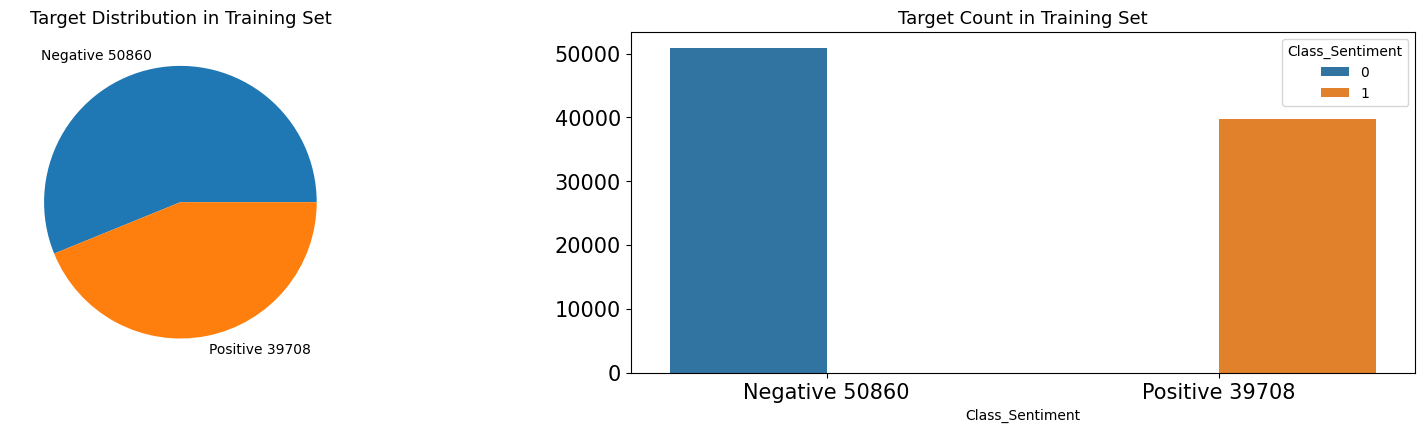

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

df.groupby('Class_Sentiment').count()["Body"].plot(kind='pie', ax=axes[0],labels=[f'Negative {neg}', f'Positive {pos}',f'Neutral {neu}'])
sns.countplot(x=df['Class_Sentiment'], hue=df['Class_Sentiment'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels([f'Negative {neg}', f'Positive {pos}',f'Neutral {neu}'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

In [ ]:
df = df[df.Class_Sentiment != 2]

In [ ]:
df

,Unnamed: 0,Body,Class_Sentiment
0,0,Attached is a revised Credit Watch listing for...,0
1,1,continental has a price of $ 297. 17 ( non - r...,1
2,2,continental has a price of $ rs 297. 17 ( non ...,1
3,3,it continental has a price of $ f 297. 17 ( cu...,1
4,4,continental has a price tag of $ 297. 17 ( non...,1
...,...,...,...
93854,93854,"Thank you, I appreciate it.",1
93857,93857,Thanks Daryna â€“ you too!,1
93859,93859,Sorry Alex â€“ could you also explain why the ...,0
93861,93861,"Sergey, itâ€™s working.Â Thanks. Feel free to...",1


It seems like that our dataset is not Balanced let's try to balance them 

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-06-28 01:01:44--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.95.109
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.95.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94 [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]      94  --.-KB/s    in 0s      

2022-06-28 01:01:44 (5.35 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [94/94]



In [ ]:
!gzip -d GoogleNews-vectors-negative300.bin.gz

In [ ]:
!pip install word2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 677 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=156431 sha256=de9e43183028012bfd88079e7d89c7511b349de359f03035af0f38a58b6eff62
  Stored in directory: /root/.cache/pip/wheels/c9/c0/d4/29d797817e268124a32b6cf8beb8b8fe87b86f099d5a049e61
Successfully built word2vec


In [ ]:
from nlpaug.util.file.download import DownloadUtil


In [ ]:
!pip install librosa>=0.7.1 matplotlib


In [ ]:
df.groupby("Class_Sentiment").count()['Body'][1]


39708

In [ ]:
df1 = df[df['Class_Sentiment'] >= 0]

**Balancing the Positive First**

We have a differance of 14 468 element, we are going to use nlpaug which Insert word by contextual word embeddings 

In [ ]:
# model_type: word2vec, glove or fasttext
import numpy as np
test=False
i,j=0,0
k=0
while(test == False):  
  aug = naw.ContextualWordEmbsAug(
      model_path='bert-base-uncased', action="insert")
  if(df['Class_Sentiment'][i]==1):   
    
    augmented_text = aug.augment(df['Body'][i])
    row=[augmented_text ,df['Class_Sentiment'][i]]
    df=pd.DataFrame(np.insert(df.values,1,row,axis=0),columns=["Body","Class_Sentiment"])
    df.to_csv(r'/content/drive/MyDrive/Emails.csv', index=True)
    j=j+1
    print(i)
    print('*********')
    print(df['Body'][i])
    print('*********')
    print(augmented_text)
    print('*********')
    print(j)
    print('*********')

  if(j==2500):
    test=True
  if k==1:
    i=i+1
    k=-1
  k=k+1  

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
3079
*********
Lunch (pizza!) will be provided on Friday, November 30, by Tim Belden and Chris Calger to everyone on the floor as a thanks for all you've done for Enron and your patience during this trying time. 
*********
lunch ( super pizza! ) will just be provided automatically on happy friday, november of 30, by tim belden smith and chris calger to the everyone on the floor as a thanks for spending all you've just done for enron and your patience during this hard trying time.
*********
68
*********
3080
*********
Tell her thank you though. I will call you. 
*********
tell old her thank goodness you afterwards though. i myself will call you.
*********
69
*********
3081
*********
Scott, I'd like to confirm our meeting with you and your group this afternoon at 3pm to discuss the current state of the weather risk market and our products. How many people should we expect to be attending? Do you have a conference room reserved? Thanks, G